<a href="https://colab.research.google.com/github/CamilaVillarreal/Comision-252613-TPI-Data-Analytics-Final/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comisión 252613 - TPI Data Analytics
Nombre y apellido: Camila Villarreal

# Etapa 1

## Script básico
Actividades 2 y 3

In [9]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'Zapatillas', 'precio': 160000.0, 'cantidad': 5},
  {'producto': 'Camisas', 'precio': 70000.0, 'cantidad': 12},
  {'producto': 'Medias', 'precio': 25000.0, 'cantidad': 10}
]

In [10]:
# Calculamos las ventas acumuladas - map
ventas_acumulada = sum(map(lambda x: x['cantidad'], ventas))
print(ventas_acumulada)


27


In [11]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

1890000.0

## Import Datasets
Actividad 1

In [12]:
import pandas as pd

In [13]:
# Import dataset ventas
df_ventas = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/ventas.csv")

In [14]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/clientes.csv")

In [15]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/marketing.csv")


### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [16]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [17]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
#df_ventas.tail()
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [18]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
1579,2747,Cámara digital,$106.28,7.0,29/06/2024,Electrónica
1321,1025,Lavadora,$119.78,9.0,26/05/2024,Electrodomésticos
1130,1666,Secadora,$99.75,4.0,04/05/2024,Electrodomésticos
2674,757,Elementos de cerámica,$36.44,10.0,17/11/2024,Decoración
1424,2854,Tablet,$56.11,7.0,07/06/2024,Electrónica


In [19]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].describe()



,cantidad
count,3033.000000
mean,6.496538
std,3.457250
min,1.000000
25%,3.000000
50%,7.000000
75%,9.000000
max,12.000000


In [20]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"]



,fecha_venta
0,02/01/2024
1,02/01/2024
2,02/01/2024
3,02/01/2024
4,02/01/2024
...,...
3030,30/12/2024
3031,30/12/2024
3032,30/12/2024
3033,30/12/2024


In [21]:
# Analizamos el campo categoria
# Probar con value_counts y unique

#df_ventas["categoria"].unique()
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


### Calidad de datos
Actividad 5

In [22]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [23]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="producto")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
833,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
857,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
868,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
...,...,...,...,...,...,...
854,2108,SmartWatch,$79.37,10.0,06/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
825,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
877,2373,Smartphone,$123.60,12.0,07/04/2024,Electrónica


In [24]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [25]:
# Visualizar los nulos
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [26]:
# Analizar los precios de los NaN a ver que opciones tenemos
df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
#df_ventas["producto"].value_counts()



,id_venta,producto,precio,cantidad,fecha_venta,categoria
36,17,Elementos de cerámica,$108.48,11.0,07/01/2024,Decoración
51,687,Elementos de cerámica,$27.68,8.0,08/01/2024,Decoración
71,817,Elementos de cerámica,$106.31,1.0,10/01/2024,Decoración
95,507,Elementos de cerámica,$111.10,1.0,13/01/2024,Decoración
97,987,Elementos de cerámica,$102.62,3.0,13/01/2024,Decoración
...,...,...,...,...,...,...
2892,427,Elementos de cerámica,$60.13,6.0,14/12/2024,Decoración
2904,567,Elementos de cerámica,$97.22,8.0,15/12/2024,Decoración
2961,917,Elementos de cerámica,$52.65,8.0,22/12/2024,Decoración
2972,497,Elementos de cerámica,$124.16,4.0,23/12/2024,Decoración


### Observaciones




* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype


## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [27]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [28]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

df_marketing.tail()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025
89,11,Freidora eléctrica,RRSS,5.27,29/12/2024,21/1/2025


In [29]:
# Analizamos el campo costo
df_marketing["costo"].sample()

,costo
75,4.64


In [30]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
1,26/03/2024
54,22/08/2024
33,10/07/2024
86,13/12/2024
32,08/07/2024


In [31]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
39,01/08/2024
80,13/1/2025
84,8/1/2025
51,26/09/2024
30,15/07/2024


### Calidad de los datos


In [32]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()


np.int64(0)

In [33]:
# Buscamos registros Null

df_marketing.isnull().sum()


,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


In [34]:
#Amalises de medio de venta
df_marketing["canal"].value_counts()


,count
canal,
TV,30
RRSS,30
Email,30


### Observaciones
* Cantidad de registros: 90
* Columnas 6
* 0 registros duplicados
* 0 registros Null

## Dataframe clientes

### Analisis exploratorio de datos

In [35]:
#Análisis general del DataFrame
df_clientes.info()
#df_clientes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [36]:
#Ver la cantidad de ciudades únicas
#df_clientes["ciudad"].nunique()
df_clientes["ciudad"].value_counts()


,count
ciudad,
Mar del Plata,63
Rosario,55
Posadas,52
Resistencia,50
Córdoba,49
Corrientes,47
Santa Fe,46
Bahía Blanca,44
Salta,43


In [37]:
#calcular el promedio de edades
df_clientes["edad"].mean()

np.float64(37.94003527336861)

In [38]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [39]:
# Buscamos registros Null
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones
* Cantidad de registros: 567
* Columnas 5
* 0 registros duplicados
* 0 registros Null
* El promedio de edad es 37

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [40]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [41]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [42]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [43]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [44]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [45]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
1729,64.92
2793,113.18
964,65.35


In [46]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [47]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [48]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [49]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [50]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

### Dataframe marketing

* Transformacion de fecha tipo Texton a datetime

In [51]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], dayfirst=True)


In [52]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], dayfirst=True)

In [53]:
# Validamos los cambios
df_marketing.info()
df_marketing[['fecha_inicio','fecha_fin']].sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


,fecha_inicio,fecha_fin
41,2024-07-25,2024-08-31
71,2024-10-23,2024-11-24
5,2024-04-01,2024-05-05
39,2024-07-17,2024-08-01
44,2024-08-02,2024-09-20


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [54]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [55]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]


In [56]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [57]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = df_ventas.groupby("producto", as_index=False)["valor_venta"].sum()

In [58]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


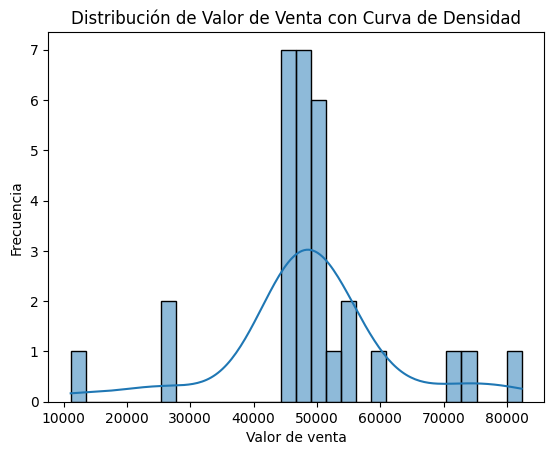

In [59]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [60]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [61]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [62]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [63]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [64]:
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [65]:
# Ordenar y mostrar los resultados
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [66]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [67]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [68]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")

In [69]:
# Verificar coincidencias (muestra)
ventas_marketing.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29


### Analizamos el impacto de la campaña

In [70]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ventas_durante_campaña = ['producto', 'valor_venta', 'costo']


In [71]:

# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

,valor_venta,costo
categoria,,
Decoración,1437648.27,15774.86
Electrodomésticos,1515898.89,14644.65
Electrónica,1447733.40,14243.90


In [72]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
df_ventas["diferencia"] = df_ventas["valor_venta"] - df_ventas["precio"]

In [73]:
# Verificar nueva columna con la diferencia
df_ventas.head()



,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,diferencia
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,279.76
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,420.40
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,195.92
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,800.45
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,318.63


### Unimos los dataframes ventas con marketing

In [74]:
# Hacemos el merge entre marketing y ventas por columna producto
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
print("Cantidad de registros: ", len(ventas_marketing))

Cantidad de registros:  8994


In [75]:
# Visualizemos algunos registros luego del merge (ordenados por producto, id_venta)
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
4602,10,Adorno de pared,446.50,TV,4.81,2024-06-29,2024-03-20,2024-05-03
4603,10,Adorno de pared,446.50,Email,5.08,2024-06-29,2024-04-13,2024-05-10
4604,10,Adorno de pared,446.50,RRSS,4.16,2024-06-29,2024-10-22,2024-12-21
303,20,Adorno de pared,180.42,TV,4.81,2024-01-14,2024-03-20,2024-05-03
304,20,Adorno de pared,180.42,Email,5.08,2024-01-14,2024-04-13,2024-05-10
305,20,Adorno de pared,180.42,RRSS,4.16,2024-01-14,2024-10-22,2024-12-21


In [76]:
# Visualizamos algunos registros, pero ordenamos por fecha_venta
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["valor_venta"], ascending=False).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
1646,2063,Smartphone,1488.12,TV,4.78,2024-03-05,2024-09-28,2024-10-24
1644,2063,Smartphone,1488.12,RRSS,6.37,2024-03-05,2024-03-29,2024-05-16
1645,2063,Smartphone,1488.12,Email,4.65,2024-03-05,2024-05-28,2024-06-15
2625,1109,Batidora,1485.96,Email,4.48,2024-04-11,2024-04-10,2024-06-08
2627,1109,Batidora,1485.96,RRSS,4.52,2024-04-11,2024-11-01,2024-12-08
2626,1109,Batidora,1485.96,TV,6.28,2024-04-11,2024-08-27,2024-10-11


Luego del merge encontramos:

* Aparecen ventas duplicadas, por ejemplo los primeros 3 registros con id_venta 2063, dado que ese producto tuvo 3 campañas de marketing, pero para este caso fue vendido fuera del período de marketing.
* Y ver el caso de los últimos 3 registros con id_venta 1109, dos de ellos dentro y uno fuera del período


Se generar dos nuevos dataframes, uno con aquellas ventas dentro del período de marketing, y otro fuera del período

### Ventas dentro de la campaña

In [77]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña de marketing
ventas_con_marketing = ventas_marketing.query("fecha_venta >= fecha_inicio & fecha_venta <= fecha_fin")
print("Cantidad de registros dentro de la campaña: ", len(ventas_con_marketing))

Cantidad de registros dentro de la campaña:  847


In [78]:
# Visualicemos algunos de los registros de ventas durante la campaña de marketing
ventas_con_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
7937,70,Adorno de pared,1265.04,RRSS,4.16,2024-11-18,2024-10-22,2024-12-21
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
8450,130,Adorno de pared,206.10,RRSS,4.16,2024-12-08,2024-10-22,2024-12-21
7508,190,Adorno de pared,360.80,RRSS,4.16,2024-10-30,2024-10-22,2024-12-21
2160,210,Adorno de pared,286.68,TV,4.81,2024-03-24,2024-03-20,2024-05-03


In [79]:
# Como vemos algunos duplicados, listemos solo esos
ventas_con_marketing_duplicados = ventas_con_marketing[ventas_con_marketing.duplicated(subset="id_venta",keep=False)]
ventas_con_marketing_duplicados[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
3195,100,Adorno de pared,897.28,TV,4.81,2024-05-02,2024-03-20,2024-05-03
3196,100,Adorno de pared,897.28,Email,5.08,2024-05-02,2024-04-13,2024-05-10
3237,220,Adorno de pared,498.24,TV,4.81,2024-05-03,2024-03-20,2024-05-03
3238,220,Adorno de pared,498.24,Email,5.08,2024-05-03,2024-04-13,2024-05-10
2985,320,Adorno de pared,224.28,TV,4.81,2024-04-25,2024-03-20,2024-05-03
2986,320,Adorno de pared,224.28,Email,5.08,2024-04-25,2024-04-13,2024-05-10


Se grupa directamente por producto, debemos antes agrupar por [id_venta, producto] quedarnos con el primer valor_venta y hacer la suma de los costos de marketing.
<BR>
Luego si agrupamos por producto, para saber el monto total de venta para cada uno.

In [80]:
# Entonces grupamos primero por id_venta y producto
# de esa particion, nos quedamos con la primera venta y la suma de los costos de marketing
ventas_con_marketing_agg1 = ventas_con_marketing.groupby(["id_venta","producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first"),
    costo_agg=("costo", "sum")
)

print("Cantidad de registros con id_venta únicos: ", len(ventas_con_marketing_agg1))

Cantidad de registros con id_venta únicos:  768


In [81]:
# Verificamos la consistencia de los montos, ventas y costos de marketing
ventas_con_marketing_agg1[["id_venta","producto", "valor_venta", "costo_agg"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


,id_venta,producto,valor_venta,costo_agg
20,70,Adorno de pared,1265.04,4.16
30,100,Adorno de pared,897.28,9.89
39,130,Adorno de pared,206.10,4.16
56,190,Adorno de pared,360.80,4.16
61,210,Adorno de pared,286.68,4.81
64,220,Adorno de pared,498.24,9.89


In [82]:
# En la segunda agregacion, agrupamos solo por producto,
ventas_con_marketing_agg2 = ventas_con_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_cm=("valor_venta", "sum"),
    costo_marketing=("costo_agg", "sum")
)

# Agregamos otra columna con la ganancia
ventas_con_marketing_agg2["ganacia_producto_cm"]= ventas_con_marketing_agg2["ventas_producto_cm"]-ventas_con_marketing_agg2["costo_marketing"]

# Finalmente, ordenamos y guardamos en el dataframe final
ventas_con_marketing_final = ventas_con_marketing_agg2.sort_values(by=["ganacia_producto_cm"], ascending=False)

In [83]:
# Dataframe resultante
ventas_con_marketing_final.head(5)

,producto,ventas_producto_cm,costo_marketing,ganacia_producto_cm
4,Batidora,23460.35,227.32,23233.03
9,Cuadro decorativo,19293.71,195.51,19098.20
3,Auriculares,18181.01,212.75,17968.26
21,Parlantes Bluetooth,17942.96,144.45,17798.51
19,Lámpara de mesa,17925.37,235.19,17690.18


### Ventas fuera de la campaña de marketing

In [84]:
# filtramos solo aquellos productos que se hayan vendido fuera de la campaña
ventas_sin_marketing = ventas_marketing.query("(fecha_venta < fecha_inicio) | (fecha_venta > fecha_fin)")
print("Cantidad de registros fuera de la campaña: ", len(ventas_sin_marketing))

Cantidad de registros fuera de la campaña:  8147


In [85]:
ventas_sin_marketing[["id_venta","producto", "valor_venta", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["id_venta","producto"], ascending=True).head(6)

,id_venta,producto,valor_venta,fecha_venta,fecha_inicio,fecha_fin
2794,1,Lámpara de mesa,658.00,2024-04-17,2024-05-30,2024-06-29
2795,1,Lámpara de mesa,658.00,2024-04-17,2024-08-26,2024-10-07
1458,2,Cuadro decorativo,318.36,2024-02-27,2024-04-27,2024-06-04
1459,2,Cuadro decorativo,318.36,2024-02-27,2024-08-15,2024-09-12
1460,2,Cuadro decorativo,318.36,2024-02-27,2024-11-05,2024-12-23
6630,3,Espejo decorativo,51.32,2024-09-22,2024-05-31,2024-07-08


In [86]:
# Aquí también hay id_venta duplicados, así que procedemos igual que antes, agrupando primero por id_venta y producto
# y luego solo por producto
ventas_sin_marketing_agg1 = ventas_sin_marketing.groupby(["id_venta", "producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first")
)
print(len(ventas_sin_marketing_agg1))

ventas_sin_marketing_agg2 = ventas_sin_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_sm=("valor_venta", "sum")
)

# Ordenamos y guardamos en el dataframe final
ventas_sin_marketing_final = ventas_sin_marketing_agg2[["producto", "ventas_producto_sm"]].sort_values(by=["ventas_producto_sm"], ascending=False)

2998


In [87]:
ventas_sin_marketing_final.head(5)

,producto,ventas_producto_sm
19,Lámpara de mesa,82276.38
3,Auriculares,74175.58
20,Microondas,72562.89
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60


### Grafico ventas y costos de marketing apilado


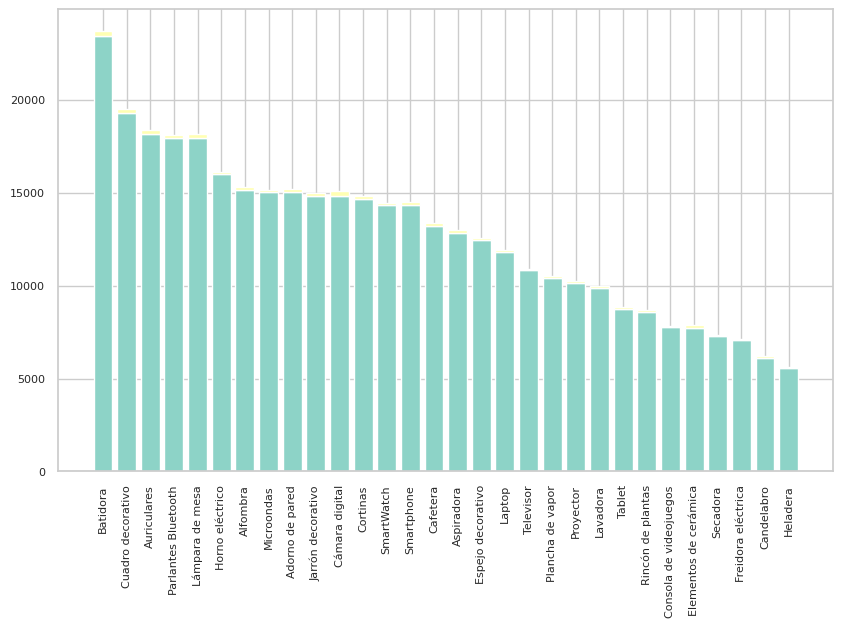

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

# Estilos
sns.set_theme(
    style="whitegrid",
    palette="Set3",
    context="notebook")
plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["ventas_producto_cm"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["costo_marketing"],
        bottom=ventas_con_marketing_final["ventas_producto_cm"],
        label="Costo Marketing")


plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Etapa 3 - Análisis de Datos

## Estadística Descriptiva

Se realiza análisis estadístico y exploratorio sobre los datos procesados.
sobre:
* df_ventas
* df_marketing

 Debemos calcular medidas de tendencia central y dispersión sobre las ventas.

 Limpieza de datos, obtuvimos los dataframes:

* df_ventas
* df_marketing

Usamos el método describe para obtener un resumen de las:
* Medidas de posición

In [89]:
# Dataframe ventas
df_ventas[["precio", "cantidad", "valor_venta"]].describe()
# df_ventas.describe()

,precio,cantidad,valor_venta
count,2998.000000,2998.000000,2998.000000
mean,75.291318,6.502668,489.357412
std,28.736008,3.455107,334.281817
min,26.000000,1.000000,26.300000
25%,50.030000,3.000000,220.920000
50%,75.205000,7.000000,418.065000
75%,100.067500,9.000000,709.920000
max,124.970000,12.000000,1488.120000


In [90]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [91]:
# Dataframe marketing
df_marketing.groupby("canal")["costo"].describe()

,count,mean,std,min,25%,50%,75%,max
canal,,,,,,,,
Email,30.0,4.840000,0.898773,2.95,4.2125,4.895,5.5075,6.84
RRSS,30.0,5.030333,0.894101,3.16,4.5600,5.130,5.5425,7.16
TV,30.0,4.915667,1.063215,3.06,4.3725,4.795,5.5400,7.39


## Análisis Exploratorio de Datos (EDA)

 Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

### Histograma

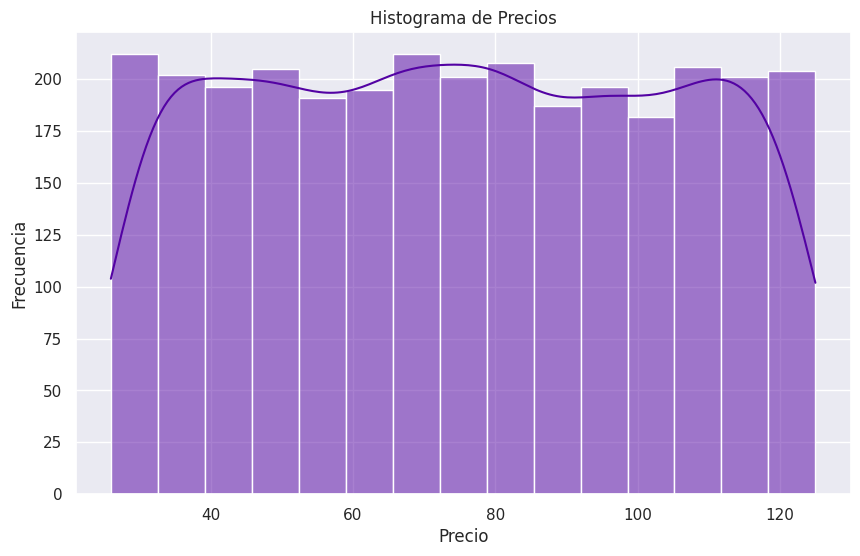

In [92]:
# Histograma de precios

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="plasma")
plt.figure(figsize=(10, 6))

# Graficamos
sns.histplot(data=df_ventas, x="precio", bins="auto", kde=True)

# Títulos y leyendas
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

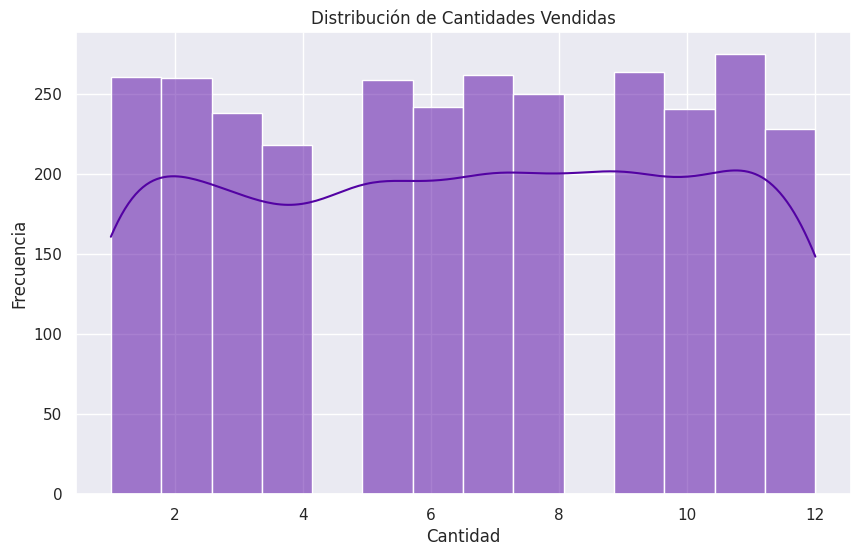

In [93]:

## Histograma de precios

# Estilo y tamaños
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid", palette="plasma")

# Graficamos

sns.histplot(df_ventas["cantidad"], kde=True, bins="auto")

# Títulos y leyendas
plt.title("Distribución de Cantidades Vendidas")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()


### Boxplot

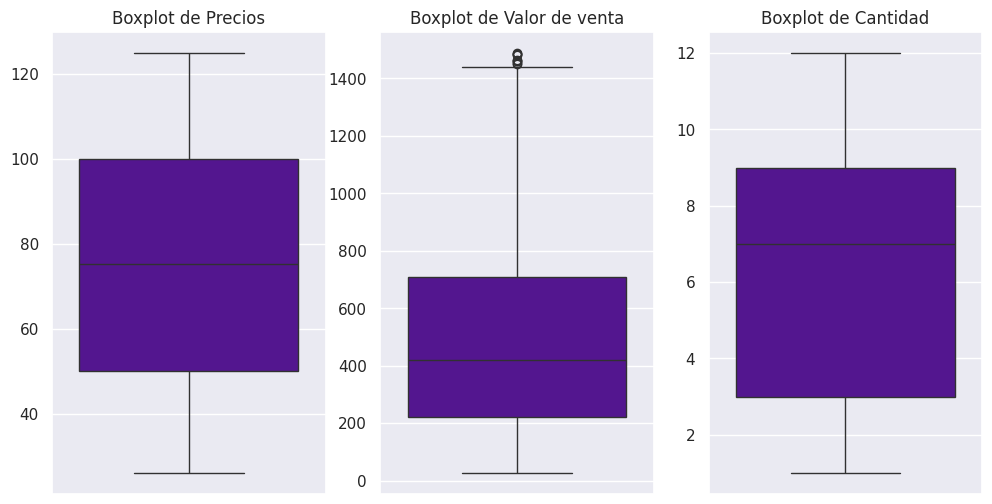

In [94]:
# Boxplot Ventas

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="plasma")
plt.figure(figsize=(12, 6)) #ancho x alto = resolucion

# Subplots, dividen al lienzo en partes
plt.subplot(1,3,1) # (1,3,1) => (1 fila, 3 columans, bloque 1)

# Subplot 1
sns.boxplot(data=df_ventas, y="precio")
plt.title("Boxplot de Precios")
plt.ylabel("")

# Subplot 2
plt.subplot(1,3,2) # (1,3,2) => (1 fila, 3 columans, bloque 2)
sns.boxplot(data=df_ventas, y="valor_venta")
plt.title("Boxplot de Valor de venta")
plt.ylabel("")


# Subplot 3
plt.subplot(1,3,3) # (1,3,3) => (1 fila, 3 columans, bloque 3)
sns.boxplot(data=df_ventas, y="cantidad")
plt.title("Boxplot de Cantidad")
plt.ylabel("")

plt.show()

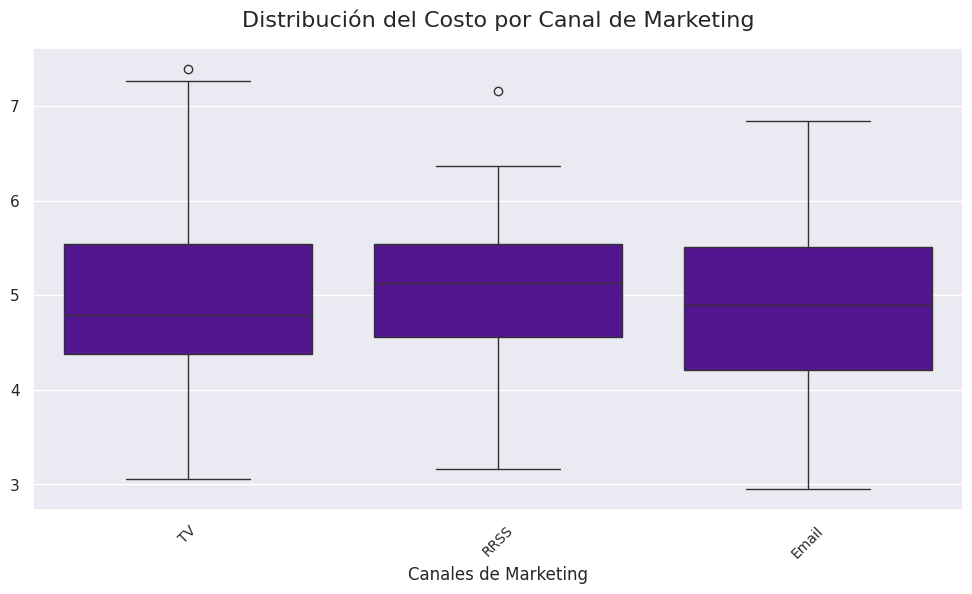

In [95]:
# Boxplot marketing

# Estilo y tamaños
sns.set_theme(style="darkgrid", palette="plasma")
plt.figure(figsize=(12, 6))

# Graficamos
sns.boxplot(data=df_marketing, x="canal", y="costo")
# sns.boxplot(data=df_marketing, y="costo") # asi grafico costo para todos los canales

# Título y subtítulo
plt.title("Distribución del Costo por Canal de Marketing", fontsize=16, pad=15)

plt.xlabel("Canales de Marketing", fontsize=12)
plt.ylabel("")

# Rotación y tamaño de labels del eje X
plt.xticks(rotation=45, fontsize=10)

plt.show()



##  Correlación

In [96]:
# Primero calculamos la matríz de correlación usando las variables numéricas
correlacion = df_ventas[['precio', 'cantidad', 'valor_venta']].corr() #.corr() calcula la matriz de correlacion
print("\nMatriz de correlación:")
print(correlacion)


Matriz de correlación:
               precio  cantidad  valor_venta
precio       1.000000 -0.002388     0.558846
cantidad    -0.002388  1.000000     0.773009
valor_venta  0.558846  0.773009     1.000000


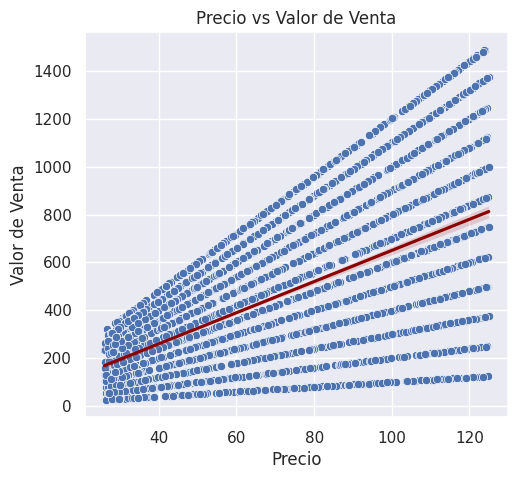

In [97]:
# Representamos las variables en un scatterplot o gráfico de dispersión
# Y agregamos una línea de tendencia

# Estilo general
sns.set_theme(style="darkgrid", palette="deep")

plt.figure(figsize=(12, 5))


#Scatter: precio vs valor_venta
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_ventas,
    x="precio",
    y="valor_venta"
)

sns.regplot(
    data=df_ventas,
    x="precio",
    y="valor_venta",
    scatter=False,
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.title("Precio vs Valor de Venta")
plt.xlabel("Precio")
plt.ylabel("Valor de Venta")


plt.show()


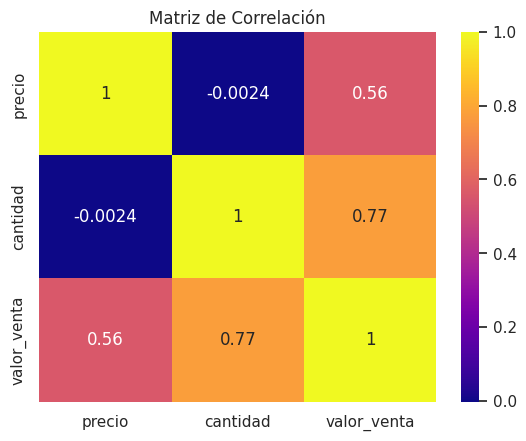

In [98]:
# Creamos un mapa de calor para representar la matríz de correlación

sns.heatmap(df_ventas[["precio", "cantidad", "valor_venta"]].corr(),
            annot=True, cmap="plasma")
plt.title("Matriz de Correlación")
plt.show()


## Consolidación de datos

Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

Aquí intervienen los KPIs, esto es, cuáles son las métricas que le interesan al negocio.

KPIs:

* Importe total de ventas concretado por mes
* Cantidad de productos totales vendidos por mes
* Volumen de venta por categorías
* Impacto de la campaña de marketing en las ventas

### Importe total de ventas concretado por mes

In [99]:
# Corramos un head para recordar el dataframe
df_ventas.head(10)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,diferencia
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,279.76
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,420.40
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,195.92
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,800.45
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,318.63
5,1697,Horno eléctrico,35.35,9,2024-01-02,Electrodomésticos,318.15,282.80
6,1710,Plancha de vapor,65.43,2,2024-01-02,Electrodomésticos,130.86,65.43
7,2959,Proyector,88.17,9,2024-01-02,Electrónica,793.53,705.36
8,318,Rincón de plantas,79.86,11,2024-01-03,Decoración,878.46,798.60
9,419,Candelabro,66.11,8,2024-01-03,Decoración,528.88,462.77


In [100]:
# Generamos primero la columna mes
df_ventas["mes"] = df_ventas["fecha_venta"].dt.month

# Agrupamos por mes y agregamos por valor_venta
ventas_mes = df_ventas.groupby("mes", as_index=False).agg(
    ventas_mes=("valor_venta", "sum")
)

# Renombramos la columna si fuera necesario
# ventas_mes = ventas_mes.rename(columns={
#     "mes": "mes",
#     "ventas_totales": "ventas_totales"
# })

# Visualizamos
ventas_mes.head()

,mes,ventas_mes
0,1,129604.99
1,2,118672.44
2,3,136779.15
3,4,128430.69
4,5,143727.25


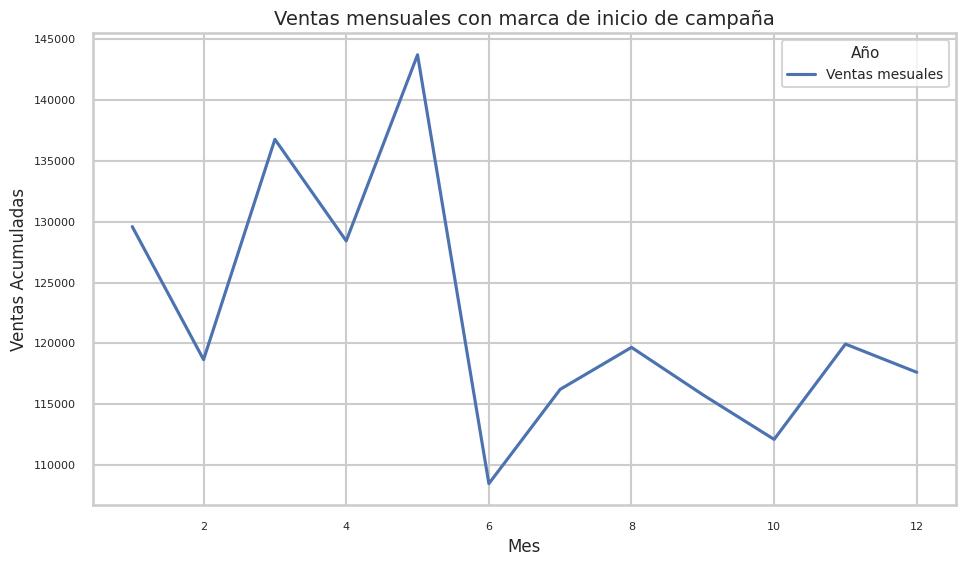

In [101]:

# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set_theme(style="whitegrid", context="talk")
custom_palette = sns.color_palette("Set2") # Aqui pueden cambiar a "Set1", "Set2", "Set3"

# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
sns.lineplot(data=ventas_mes, x="mes", y="ventas_mes", label="Ventas mesuales" )

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title('Ventas mensuales con marca de inicio de campaña', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Acumuladas', fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

### Cantidad de productos totales vendidos por mes

In [102]:
# Agrupamos por mes y agregamos por cantidad
cantidades_mes = df_ventas.groupby("mes", as_index=False).agg(
    cantidad_mes=("cantidad", "sum")
)

# Visualizamos
cantidades_mes.head()

,mes,cantidad_mes
0,1,1741
1,2,1607
2,3,1792
3,4,1715
4,5,1812


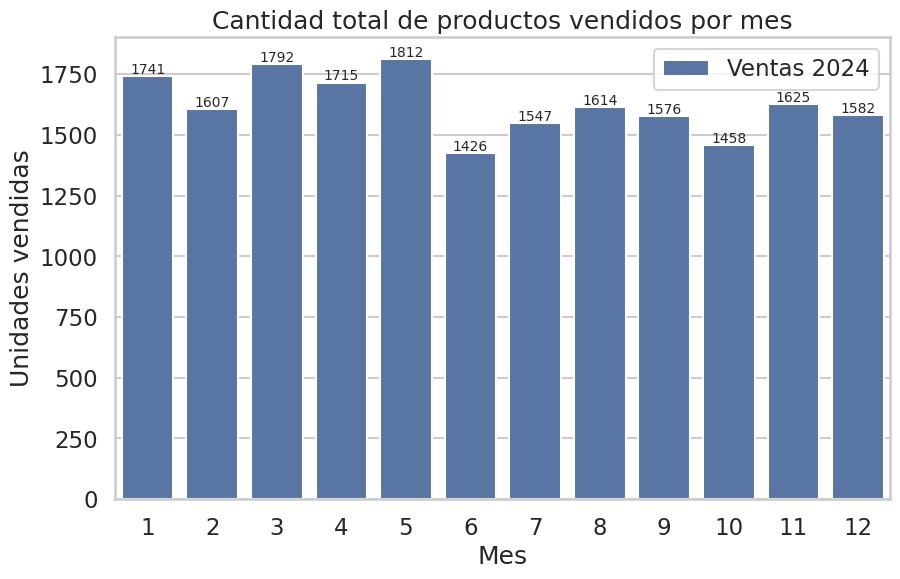

In [103]:

# Ajustamos tamaño del lienzo
plt.figure(figsize=(10,6))

# Crear el barplot
ax = sns.barplot(data=cantidades_mes, x='mes', y='cantidad_mes', label="Ventas 2024", width=0.8)

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(cantidades_mes['cantidad_mes']):
    ax.text(
        i,                       # posición x de la etiqueta
        valor + 10,                   # posición y (ligeramente arriba de la barra)
        str(valor),              # texto
        ha='center', fontsize=10
    )

# Ajustes de título y ejes
plt.title("Cantidad total de productos vendidos por mes")
plt.xlabel("Mes")
plt.ylabel("Unidades vendidas")
plt.show()


### Volumen de venta por categorías

In [104]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,diferencia,mes
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,279.76,1
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,420.40,1
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,195.92,1
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,800.45,1
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,318.63,1


In [105]:
# Agrupamos por categoría y agregamos por valor_venta
ventas_categoria = df_ventas.groupby("categoria", as_index=False).agg(
    ventas_totales=("valor_venta", "sum")
)

# Visualizamos
ventas_categoria.head()

,categoria,ventas_totales
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


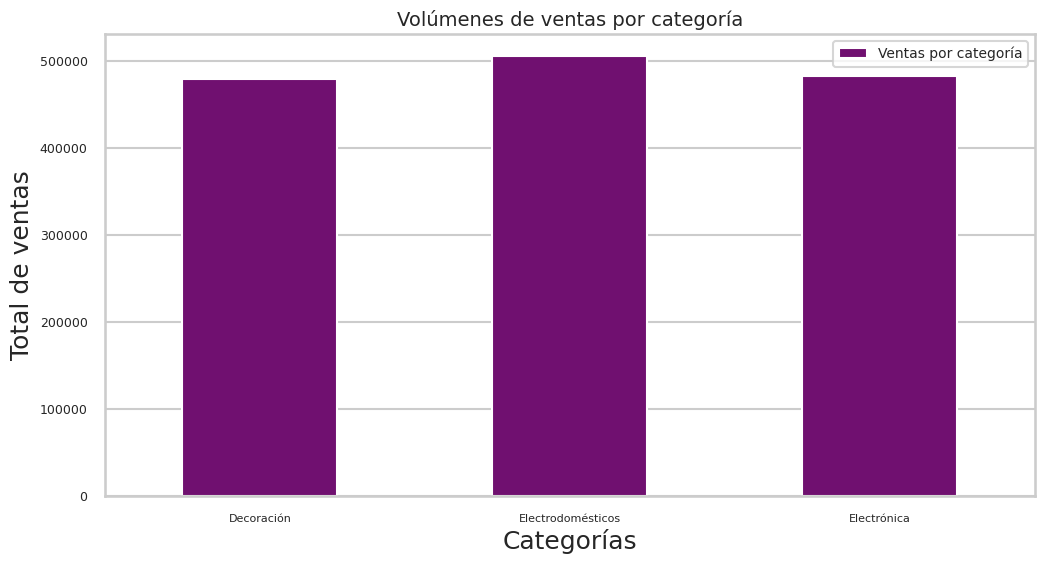

In [106]:

# Ajustamos tamaño del lienzo
plt.figure(figsize=(12,6))


# Crear el barplot
ax = sns.barplot(data=ventas_categoria, x='categoria', y='ventas_totales', label="Ventas por categoría",color="purple", width=0.5)


# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=8)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por categoría', fontsize=14)
plt.xlabel('Categorías')
plt.ylabel('Total de ventas')
plt.legend(loc='upper right', fontsize=10)
# plt.tight_layout() # ajuste automatico
plt.show()

### Impacto de la campaña de marketing en las ventas

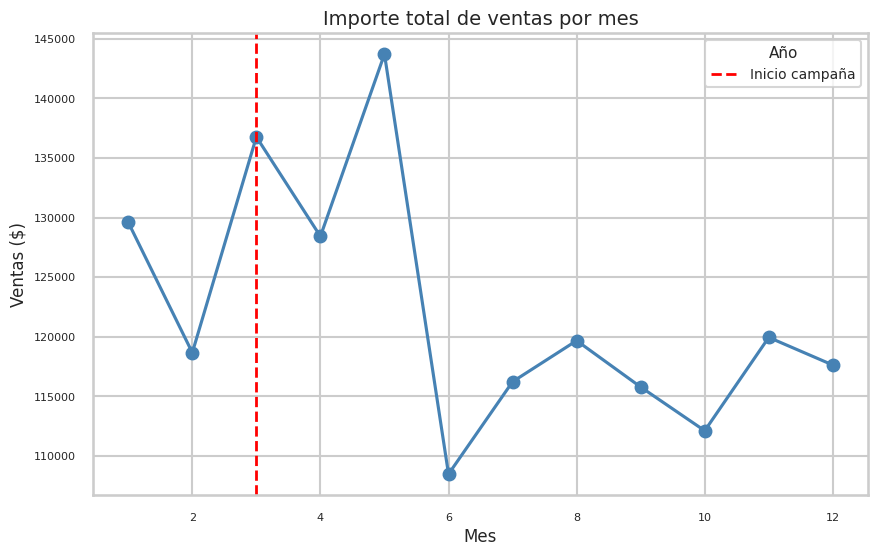

In [107]:
# Generamos un gráfico de lineas (serie de tiempo)
# que muestre la evolución de las ventas en el año (2024 por mes)
import matplotlib.pyplot as plt
import seaborn as sns


# Definimos el tamaño del lienzo
plt.figure(figsize=(10,6))

# Graficamos
plt.plot(ventas_mes["mes"], ventas_mes["ventas_mes"], marker="o", color="steelblue")
plt.axvline(3, color="red", linestyle="--", linewidth=2, label="Inicio campaña")

# Ticks (valores de eje)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Ajustes de título y ejes
plt.title("Importe total de ventas por mes", fontsize=14)
plt.xlabel("Mes",fontsize=12)
plt.ylabel("Ventas ($)", fontsize=12)
plt.legend(title='Año', fontsize=10, title_fontsize=11)
plt.show()

##  Presentación Final

# Observaciones

## Los datos presentan variación en ventas según el canal utilizado y existen diferencias notorias entre lo invertido y lo vendido. También se observan ciudades con mayor concentración de clientes.



# Hallazgos

## Se identificó cuál es el canal con mayor cantidad de ventas, el promedio de edad de los clientes y las ciudades más frecuentes. Además, se detectó la diferencia entre monto invertido y monto vendido.


# Recomendaciones

## Optimizar inversión en los canales que generan más ventas, revisar los que rinden poco y segmentar las estrategias según las ciudades con mayor presencia de clientes.